# ElectroMioGraphy Overview - Solution

Electromyography (EMG) is a technique used to evaluate and record the electrophysiological activity produced by a person's muscles. It measures muscle response or electrical activity in response to a nerve’s stimulation of the muscle. The test is used to help detect neuromuscular abnormalities. During the test, one or more small needles (also called electrodes) are inserted through the skin into the muscle

In this practical experience, we will focus on the acquisition of EMG signals, showcasing the importance of adhering to Shannon's sampling theorem. 

10. Go back to step 5, change the sampling rate to 100Hz and redo the acquisition trying to make the same movement. 
11. Go back to step 5 again and repeat with a sampling rate of 10 Hz. 

## Data analysis 

First step is to load the needed packages:

In [1]:
# Biosignalsnotebooks python package
import biosignalsnotebooks as bsnb

# Package used for loading data from the input h5 file
import h5py
from h5py import File
# Scientific packages
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from scipy.signal import welch
from scipy import signal
from sklearn import preprocessing

To highlight the issues generated by the aliasing phenomenon, we recorded muscle movement at 1kHz, 100Hz and 10Hz sampling frequencies.

We then import the three recorded signals by entering the absolute path. 

In [2]:
file_path_1k = "C://Users//smarocco.inst//Desktop//SUPSI//WORK//LAB BioSgn//EMG_1k.h5"
file_path_100 = "C://Users//smarocco.inst//Desktop//SUPSI//WORK//LAB BioSgn//EMG_100.h5"
file_path_10 = "C://Users//smarocco.inst//Desktop//SUPSI//WORK//LAB BioSgn//EMG_10.h5"
h5_object_1k = File(file_path_1k)
h5_object_100 = File(file_path_100)
h5_object_10 = File(file_path_10)

The objects we are going to analyze are files of type .h5.

Let us proceed to analyze the composition of the file in a hierarchical manner:

In [3]:
# Keys list (.h5 hierarchy ground level)
print(list(h5_object_1k.keys()))

['84:BA:20:AE:BB:F8']


In [4]:
h5_group_1k = h5_object_1k.get('84:BA:20:AE:BB:F8')
print ("Second hierarchy level: " + str(list(h5_group_1k)))
h5_group_100 = h5_object_100.get('84:BA:20:AE:BB:F8')
print ("Second hierarchy level: " + str(list(h5_group_1k)))
h5_group_10 = h5_object_10.get('84:BA:20:AE:BB:F8')
print ("Second hierarchy level: " + str(list(h5_group_1k)))

Second hierarchy level: ['digital', 'events', 'plugin', 'raw', 'support']
Second hierarchy level: ['digital', 'events', 'plugin', 'raw', 'support']
Second hierarchy level: ['digital', 'events', 'plugin', 'raw', 'support']


In [5]:
print ("Metadata of h5_group: \n" + str(list(h5_group_1k.attrs.keys())))

Metadata of h5_group: 
['channels', 'comments', 'date', 'device', 'device connection', 'device name', 'digital IO', 'duration', 'firmware version', 'keywords', 'macaddress', 'mode', 'nsamples', 'resolution', 'sampling rate', 'sync interval', 'time']


Confirm that the signals have been sampled with the desired frequencies, we can access the "sampling rate" metadata. We check that the different signals are sampled as required:

In [6]:
sampling_rate_1k = h5_group_1k.attrs.get("sampling rate")
print ("Sampling Rate: " + str(sampling_rate_1k))
sampling_rate_100 = h5_group_100.attrs.get("sampling rate")
print ("Sampling Rate: " + str(sampling_rate_100))
sampling_rate_10 = h5_group_10.attrs.get("sampling rate")
print ("Sampling Rate: " + str(sampling_rate_10))

Sampling Rate: 1000
Sampling Rate: 100
Sampling Rate: 10


For this experiment we are interested in manipulating data from sensors, so we are going to modify the "raw" data.  We therefore access the third hierarchical level of the data format.  

In [7]:
h5_sub_group_1k = h5_group_1k.get("raw")
print("Third hierarchy level: " + str(list(h5_sub_group_1k)))

h5_sub_group_100 = h5_group_100.get("raw")
print("Third hierarchy level: " + str(list(h5_sub_group_100)))

h5_sub_group_10 = h5_group_10.get("raw")
print("Third hierarchy level: " + str(list(h5_sub_group_10)))

Third hierarchy level: ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'nSeq']
Third hierarchy level: ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'nSeq']
Third hierarchy level: ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'nSeq']


From here the recorded data for each sensor channel can be accessed. In our case we will use the data recorded on channel 1. 

To facilitate data manipulation operations we transform a nested list to a flatten list. We then generate the signal reference time using the function bsnb.generate_time(). 

In [8]:
h5_data_1k = h5_sub_group_1k.get("channel_1")
h5_data_100 = h5_sub_group_100.get("channel_1")
h5_data_10 = h5_sub_group_10.get("channel_1")
# Conversion of a nested list to a flatten list by list-comprehension
# The following line is equivalent to:
# for sublist in h5_data:
#    for item in sublist:
#        flat_list.append(item)
signal_1k = [item for sublist in h5_data_1k for item in sublist]
signal_100 = [item for sublist in h5_data_100 for item in sublist]
signal_10 = [item for sublist in h5_data_10 for item in sublist]

time_1k = bsnb.generate_time(signal_1k, sampling_rate_1k)
time_100 = bsnb.generate_time(signal_100, sampling_rate_100)
time_10 = bsnb.generate_time(signal_10, sampling_rate_10)


We create a subplot to represent the three signals with different sampling rates. 

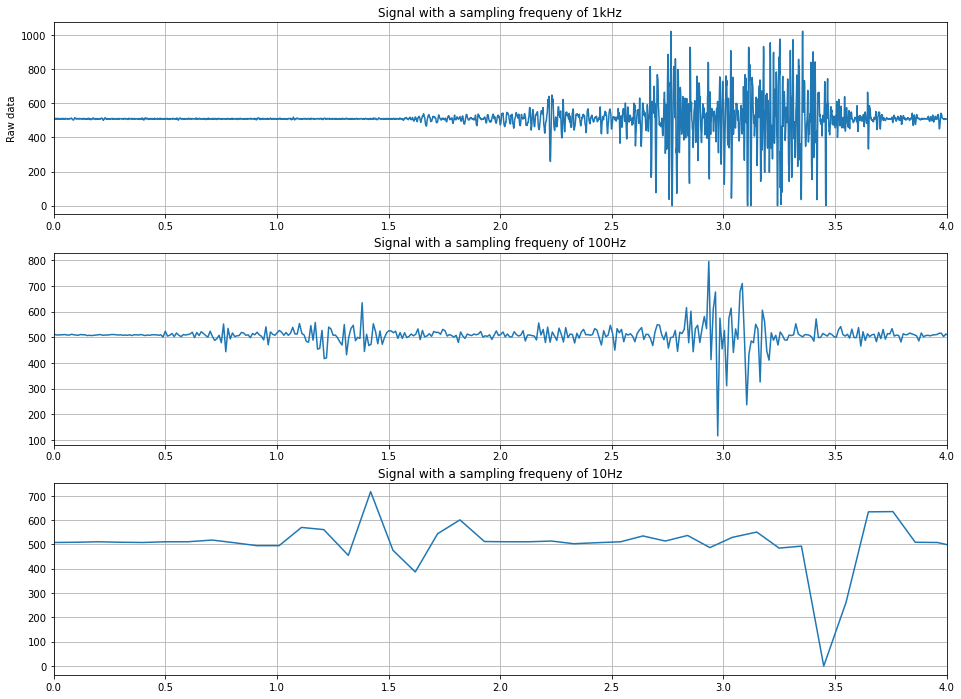

In [9]:
# Create three subplots to represent the signals
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,12))
ax1.plot(time_1k, signal_1k)
ax1.set_title('Signal with a sampling frequeny of 1kHz')
ax1.set_xlim([0, 4])
ax1.set_ylabel('Raw data')
ax1.grid()
ax2.plot(time_100, signal_100)
ax2.set_title('Signal with a sampling frequeny of 100Hz')
ax2.set_xlim([0, 4])
ax2.grid()
ax3.plot(time_10, signal_10)
ax3.set_title('Signal with a sampling frequeny of 10Hz')
ax3.set_xlim([0, 4])
ax3.grid()

From the datasheet function convert raw data to have values expressed in mV. 

$$ EMG(mV) = \frac{(\frac{ADC}{2^n}-0.5) \cdot VCC}{G}$$
Where
- VCC = 3V
- G = 1000
- ADC = Value sampled from the channel
- n = Number of bits of the channel

In [10]:
# Signal Samples Conversion
vcc = 3000 #mV
gain = 1000
resolution = 16

signal_mv_1k = (((np.array(signal_1k) / 2**resolution) - 0.5) * vcc) / gain 
signal_mv_100 = (((np.array(signal_100) / 2**resolution) - 0.5) * vcc) / gain 
signal_mv_10 = (((np.array(signal_10) / 2**resolution) - 0.5) * vcc) / gain 

At this point we can assess whether the transformation has generated artifacts or whether the signal retains the original salted components. To do this we plot the manipulated signals:

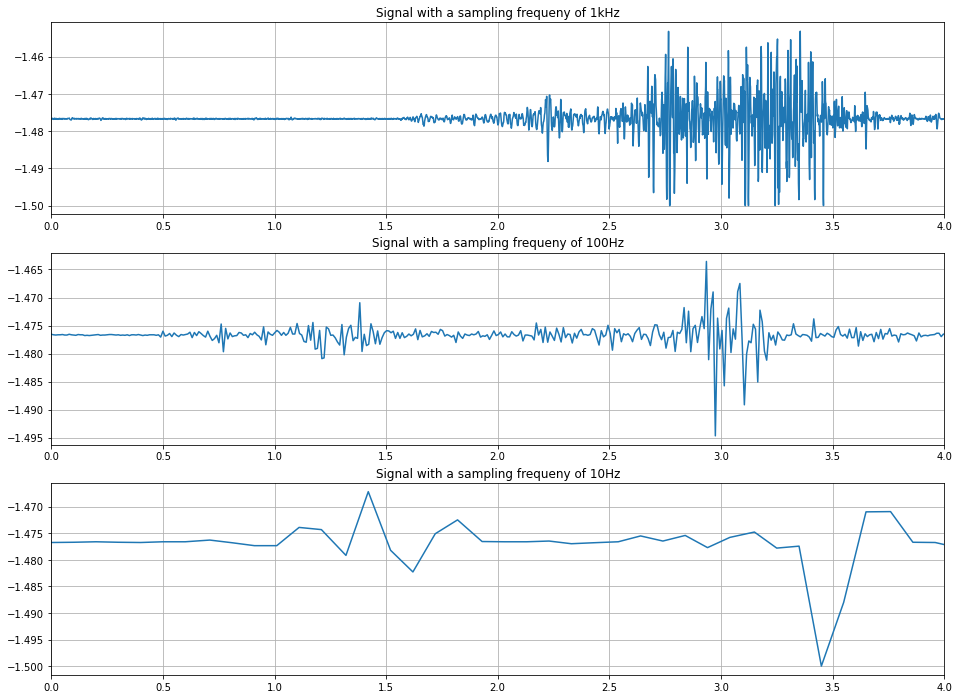

In [11]:
# Create two subplots one with the original signal and the other with the signal processed
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,12))
ax1.plot(time_1k, signal_mv_1k)
ax1.set_title('Signal with a sampling frequeny of 1kHz')
ax1.set_xlim([0, 4])
ax1.grid()
ax2.plot(time_100, signal_mv_100)
ax2.set_title('Signal with a sampling frequeny of 100Hz')
ax2.set_xlim([0, 4])
ax2.grid()
ax3.plot(time_10, signal_mv_10)
ax3.set_title('Signal with a sampling frequeny of 10Hz')
ax3.set_xlim([0, 4])
ax3.grid()

It is obvious the huge difference present in the different signals, this is caused by the sampling rate used. The distortion in the last signal is caused by not following Nyquist's theorem. It defines the minimum frequency, called Nyquist frequency (or also Nyquist cadence), required to sample an analog signal without losing information, and thus to be able to reconstruct the original continuous-time analog signal. Specifically, the theorem states that, given a function whose Fourier transform is zero outside a certain frequency range (i.e., a bandlimited signal), in its analog-to-digital conversion the minimum sampling frequency required to avoid aliasing and loss of information in reconstructing the original analog signal (i.e., in digital-to-analog reconversion) must be greater than twice its maximum frequency.  

The effects of not satisfying Nyquist's theorem are most visible in the frequency domain. Using the Fast Fourier Transform, it is possible to convert a signal from the time domain to the frequency domain. 

Before the signal FFT can be applied, however, it is necessary to perform some transformations to make the spectrum obtained from the FFT as clean as possible. 

The first step requires filtering the signal with a high pass, so as to eliminate the continuous component. We then apply a second-order high-pass Butterworth filter with a cut-off frequency of 2Hz. 

In [12]:
# Filter requirements.
fs = 1000.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       

In [13]:
def butter_highpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = signal.butter(order, normal_cutoff, btype='highpass', analog=False)
    w, h = signal.freqs(b, a, worN=np.logspace(-1, 2, 1000))
    y = signal.filtfilt(b, a, data)
    return y

In [14]:
y_1k = butter_highpass_filter(signal_mv_1k, 2, 1000, 1)
y_100 = butter_highpass_filter(signal_mv_100, 2, 1000, 1)
y_10 = butter_highpass_filter(signal_mv_10, 2, 1000, 1)

The second step requires subtracting the average from the signal to eliminate any residual offsets. 

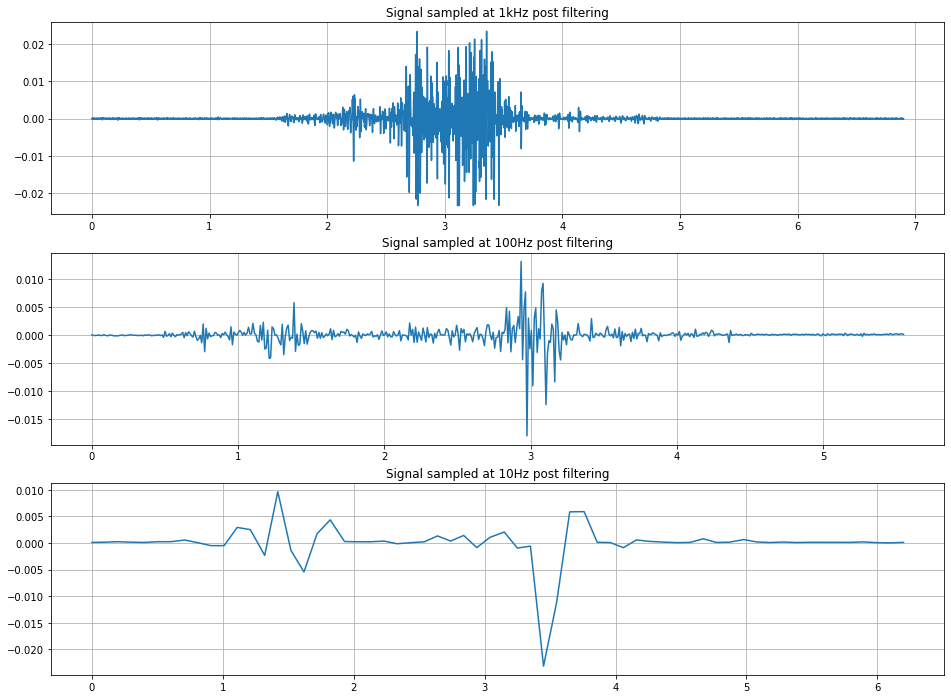

In [15]:
y_1k = y_1k - np.average(y_1k)
y_100 = y_100 - np.average(y_100)
y_10 = y_10 - np.average(y_10)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,12))
ax1.plot(time_1k, y_1k)
ax1.set_title('Signal sampled at 1kHz post filtering')
ax1.grid()
ax2.plot(time_100, y_100)
ax2.set_title('Signal sampled at 100Hz post filtering')
ax2.grid()
ax3.plot(time_10, y_10)
ax3.set_title('Signal sampled at 10Hz post filtering')
ax3.grid()

Use the function bsnb.plotfft(data, samplig rate) to generate the frequency axis and power spectrum of the signals sampled at 1000, 100 and 10 Hz. 

In [16]:
freq_axis_1k, power_spect_1k = bsnb.plotfft(y_1k, sampling_rate_1k)
freq_axis_100, power_spect_100 = bsnb.plotfft(y_100, sampling_rate_100)
freq_axis_10, power_spect_10 = bsnb.plotfft(y_10, sampling_rate_10)

To make the representation clearer, normalise the signal spectrum:

In [17]:
power_spect_1k_norm = power_spect_1k/max(power_spect_1k)
power_spect_100_norm = power_spect_100/max(power_spect_100)
power_spect_10_norm = power_spect_10/max(power_spect_10)

Represent the spectrum with subplots, placing the normalised amplitude on the y-axis and the frequencies on the x-axis. 

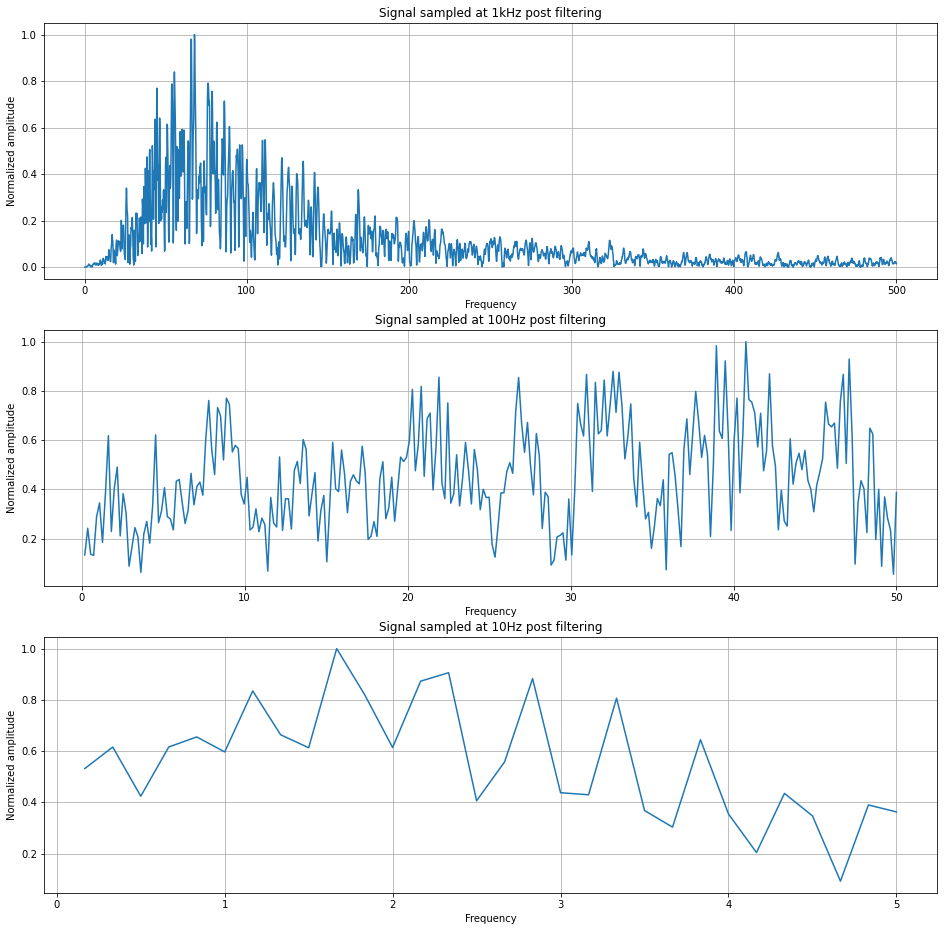

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,16))
ax1.plot(freq_axis_1k, power_spect_1k_norm)
ax1.set_title('Signal sampled at 1kHz post filtering')
ax1.set_ylabel('Normalized amplitude')
ax1.set_xlabel('Frequency')
ax1.grid()
ax2.plot(freq_axis_100, power_spect_100_norm)
ax2.set_title('Signal sampled at 100Hz post filtering')
ax2.set_ylabel('Normalized amplitude')
ax2.set_xlabel('Frequency')
ax2.grid()
ax3.plot(freq_axis_10, power_spect_10_norm)
ax3.set_title('Signal sampled at 10Hz post filtering')
ax3.set_ylabel('Normalized amplitude')
ax3.set_xlabel('Frequency')
ax3.grid()

Represent the continuous spectrum of the signal using the welch( data, sampling rate) function:

In [19]:
f_1, Pxx_den_1 = signal.welch(y_1k, sampling_rate_1k)
f_100, Pxx_den_100 = signal.welch(y_100, sampling_rate_1k)
f_10, Pxx_den_10 = signal.welch(y_10, sampling_rate_10)

C:\Users\smarocco.inst\anaconda3\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 62, using nperseg = 62
  warnings.warn('nperseg = {0:d} is greater than input length '


To make the representation clearer, normalise the signal spectrum:

In [20]:
Normalized_PSD_1 = Pxx_den_1/max(Pxx_den_1)
Normalized_PSD_10 = Pxx_den_10/max(Pxx_den_10)
Normalized_PSD_100 = Pxx_den_100/max(Pxx_den_100)

Represent the spectrum with subplots, placing the normalised amplitude on the y-axis and the frequencies on the x-axis.

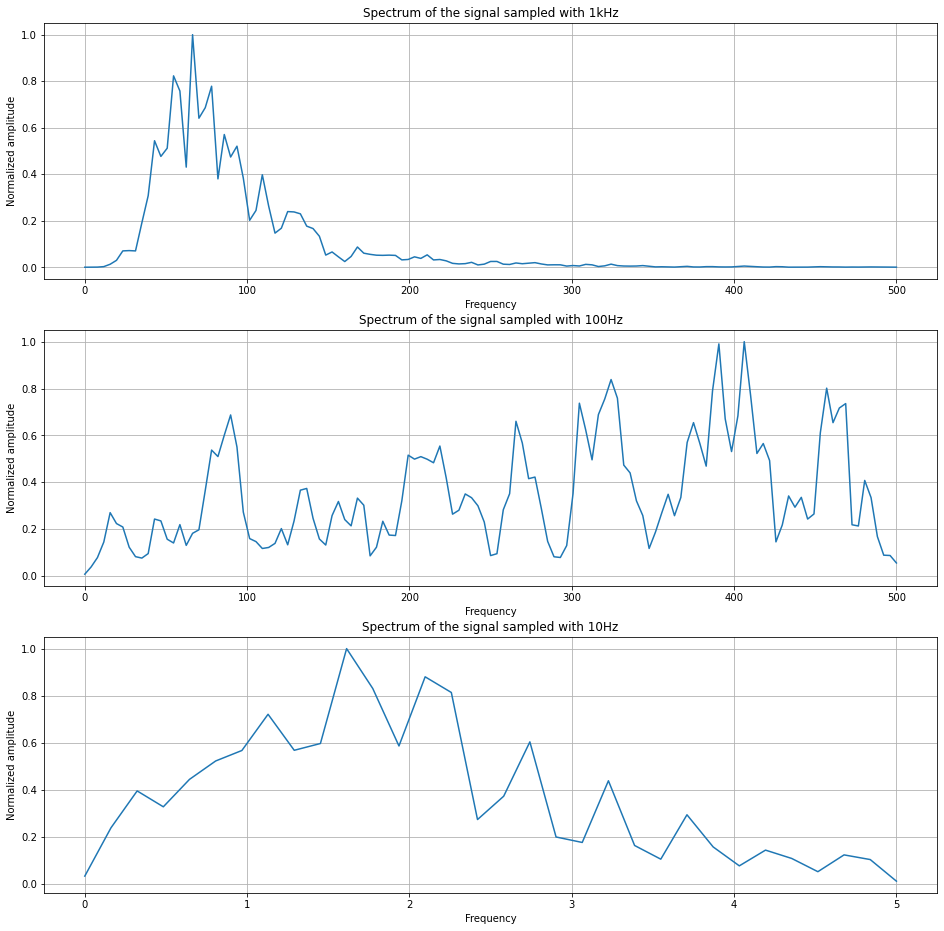

In [21]:
# Create three subplots of the spectrum
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,16))
ax1.plot(f_1, Normalized_PSD_1)
ax1.set_title('Spectrum of the signal sampled with 1kHz')
ax1.set_ylabel('Normalized amplitude')
ax1.set_xlabel('Frequency')
ax1.grid()
ax2.plot(f_100, Normalized_PSD_100)
ax2.set_title('Spectrum of the signal sampled with 100Hz')
ax2.set_ylabel('Normalized amplitude')
ax2.set_xlabel('Frequency')
ax2.grid()
ax3.plot(f_10, Normalized_PSD_10)
ax3.set_title('Spectrum of the signal sampled with 10Hz')
ax3.set_ylabel('Normalized amplitude')
ax3.set_xlabel('Frequency')
ax3.grid()

## Muscolar activation detection 

The second part of this experience is based on being able to detect the muscle activation. 

The first step is to rectify the signal:

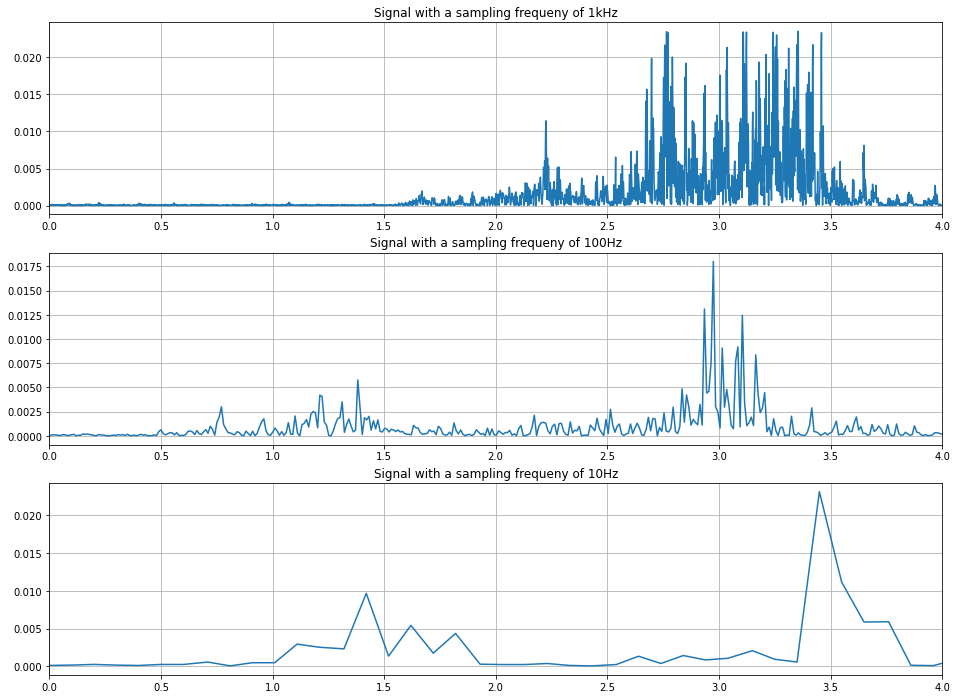

In [22]:
# [Signal Rectification]
rect_signal_1k = [abs(i) for i in y_1k]
rect_signal_100 = [abs(i) for i in y_100]
rect_signal_10 = [abs(i) for i in y_10]

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,12))
ax1.plot(time_1k, rect_signal_1k)
ax1.set_title('Signal with a sampling frequeny of 1kHz')
ax1.set_xlim([0, 4])
ax1.grid()
ax2.plot(time_100, rect_signal_100)
ax2.set_title('Signal with a sampling frequeny of 100Hz')
ax2.set_xlim([0, 4])
ax2.grid()
ax3.plot(time_10, rect_signal_10)
ax3.set_title('Signal with a sampling frequeny of 10Hz')
ax3.set_xlim([0, 4])
ax3.grid()


Smoothing of the signal provides better envelope shaping. 

A Savitzky–Golay filter is a digital filter that can be applied to a set of digital data points for the purpose of smoothing the data, that is, to increase the precision of the data without distorting the signal tendency. This is achieved, in a process known as convolution, by fitting successive sub-sets of adjacent data points with a low-degree polynomial by the method of linear least squares.



It applies the savitky-golay filter using the signal library function such as signal.savgol_filter( data, window, order, mode = 'nearest'). For the first analysis use a window of 51 and an order of 1.

In [23]:
smoothed_1k = signal.savgol_filter(rect_signal_1k, 51, 1, mode="nearest")
smoothed_100 = signal.savgol_filter(rect_signal_100, 51, 1, mode="nearest")
smoothed_10 = signal.savgol_filter(rect_signal_10, 51, 1, mode="nearest")

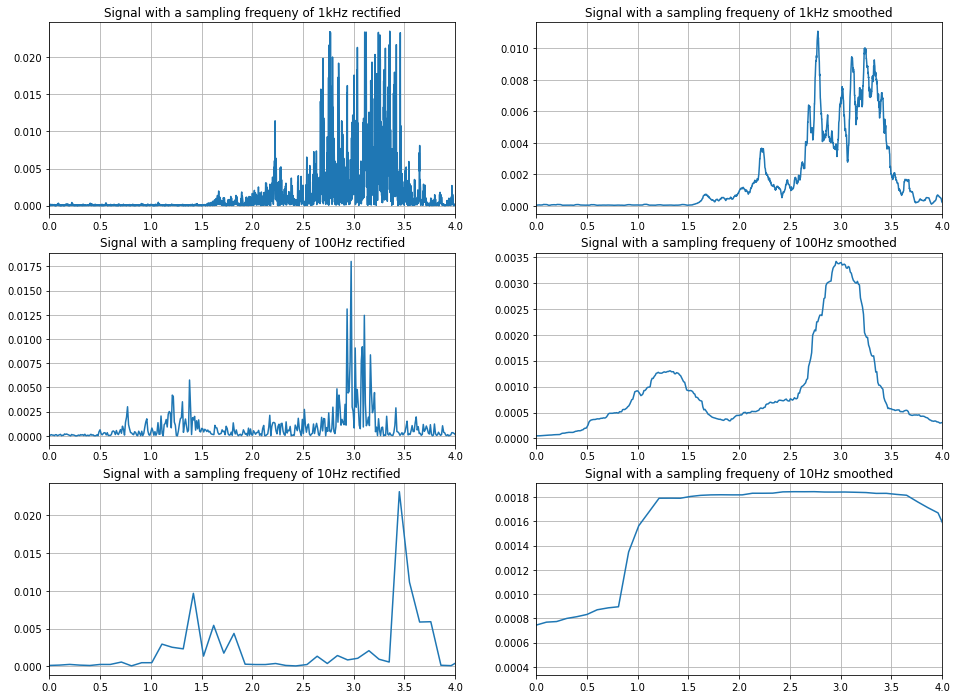

In [24]:
f, axs = plt.subplots(3, 2, figsize=(16,12))
axs[0,0].plot(time_1k, rect_signal_1k)
axs[0,0].set_title('Signal with a sampling frequeny of 1kHz rectified')
axs[0,0].set_xlim([0, 4])
axs[0,0].grid()
axs[0,1].plot(time_1k, smoothed_1k)
axs[0,1].set_title('Signal with a sampling frequeny of 1kHz smoothed')
axs[0,1].set_xlim([0, 4])
axs[0,1].grid()
axs[1,0].plot(time_100, rect_signal_100)
axs[1,0].set_title('Signal with a sampling frequeny of 100Hz rectified')
axs[1,0].set_xlim([0, 4])
axs[1,0].grid()
axs[1,1].plot(time_100, smoothed_100)
axs[1,1].set_title('Signal with a sampling frequeny of 100Hz smoothed')
axs[1,1].set_xlim([0, 4])
axs[1,1].grid()
axs[2,0].plot(time_10, rect_signal_10)
axs[2,0].set_title('Signal with a sampling frequeny of 10Hz rectified')
axs[2,0].set_xlim([0, 4])
axs[2,0].grid()
axs[2,1].plot(time_10, smoothed_10)
axs[2,1].set_title('Signal with a sampling frequeny of 10Hz smoothed')
axs[2,1].set_xlim([0, 4])
axs[2,1].grid()

To detect whether there has been actual muscle movement we set two thresholds, a first low threshold and a second high threshold: 

In [25]:
# [Threshold]
avg_signal_1k = np.average(smoothed_1k)
std_signal_1k = np.std(smoothed_1k)

avg_signal_100 = np.average(smoothed_100)
std_signal_100 = np.std(smoothed_100)

avg_signal_10 = np.average(smoothed_10)
std_signal_10 = np.std(smoothed_10)

thresh_H_1k = avg_signal_1k + std_signal_1k #Onset of muscular activation
thresh_L_1k = avg_signal_1k  #Offset of muscular activation

thresh_H_100 = avg_signal_100 + std_signal_100 #Onset of muscular activation
thresh_L_100 = avg_signal_100  #Offset of muscular activation

thresh_H_10 = avg_signal_10 + std_signal_10 #Onset of muscular activation
thresh_L_10 = avg_signal_10  #Offset of muscular activation

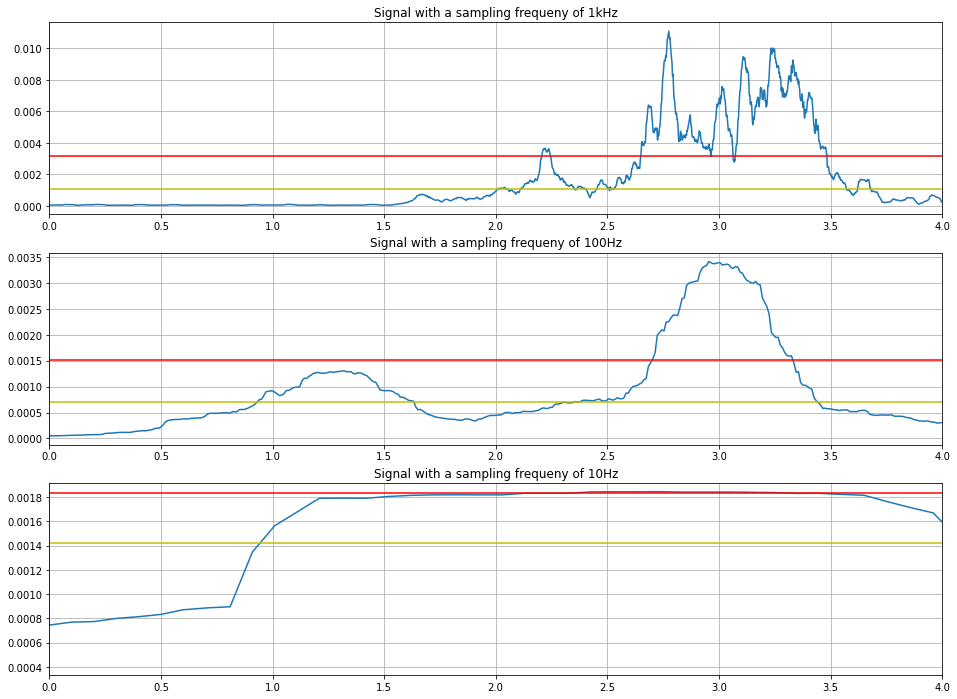

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,12))
ax1.plot(time_1k, smoothed_1k)
ax1.set_title('Signal with a sampling frequeny of 1kHz')
ax1.set_xlim([0, 4])
ax1.grid()
ax1.axhline(y=thresh_H_1k, color='r')
ax1.axhline(y=thresh_L_1k, color='y')
ax2.plot(time_100, smoothed_100)
ax2.set_title('Signal with a sampling frequeny of 100Hz')
ax2.set_xlim([0, 4])
ax2.grid()
ax2.axhline(y=thresh_H_100, color='r')
ax2.axhline(y=thresh_L_100, color='y')
ax3.plot(time_10, smoothed_10)
ax3.set_title('Signal with a sampling frequeny of 10Hz')
ax3.set_xlim([0, 4])
ax3.axhline(y=thresh_H_10, color='r')
ax3.axhline(y=thresh_L_10, color='y')
ax3.grid()

In [27]:
# Initialisation of the list that will store the start and end samples of each muscular activation period.
index_on_off=[]

# Flag that identifies when the onset was detected and the offset searching stage should begin.
flag_onset = False

# Temporary variable that will store the onset until its storage on the definitive list.
temp_onset = None

#returning the index for either onset or offset of activation
for index, sample_value in enumerate(smoothed_1k):
    # Identification of the onset index.
    if sample_value > thresh_H_1k and flag_onset is False:
        # Temporary storage of the onset index.
        temp_onset = index
        
        # Update flag.
        flag_onset = True
    # Identification of the offset index.
    elif sample_value < thresh_L_1k and flag_onset is True: 
        # Definitive storage of the onset and offset indexes.
        index_on_off.append((temp_onset, index))
        
        # Update flag.
        flag_onset = False

In [28]:
# Initialisation of the binary signal.
binary_signal = np.zeros(len(smoothed_1k))

# Change the binary signal to 1 for all samples between the onset and offset indexes.
for onset_offset in index_on_off:
    binary_signal[onset_offset[0]:onset_offset[1]] = max(y_1k)

Scaling up the signal for better understanding

In [29]:
#Scaling
scaled_signal_1k = (rect_signal_1k - min(rect_signal_1k))/(max(rect_signal_1k)-min(rect_signal_1k))

Finally, let's plot the duse signals on the same graph, note how exceeding the threshold corresponds to the detection of the muscle stimulus.

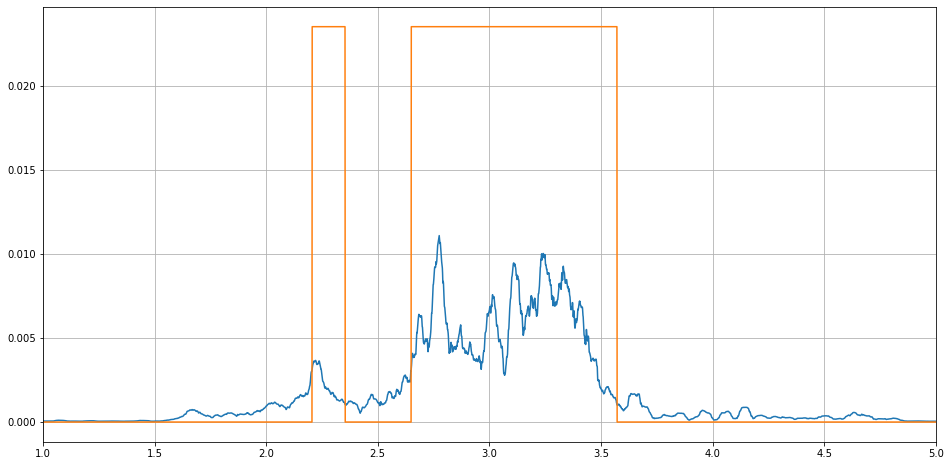

In [30]:
plt.figure(figsize=(16, 8))
plt.plot(time_1k, smoothed_1k)
plt.plot(time_1k, binary_signal)
plt.xlim([1, 5])
plt.grid()